# Python for Data Analysis Project ~ Solution
This project will test your ability to work with real-world data using Python. You will need to clean, manipulate, and analyze datasets using tools like Pandas, NumPy, Matplotlib and Seaborn.

If you find this challenging, it indicates you might need to revisit the foundational concepts covered in the Python for Data Analysis classes. Review the lecture materials, and attempt the exercises again. The goal is to ensure you can confidently handle data operations and create insightful visualizations.

For this project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Instructions  

- Answer the questions or complete the tasks outlined in **bold** below.  
- Use the specific method described if applicable.  
- **Important:** Do not run your code in the same cell where the answer is provided. Create a new cell below/above and write your code there.  
- Running code in the same cell as the answer will overwrite the provided hints and answers. Ensure you follow this structure to retain all information.  

Good luck!  

## Data and Setup

**Import numpy and pandas**

In [2]:
import numpy as np
import pandas as pd

**Import visualization libraries and set %matplotlib inline.**

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting
%matplotlib inline

**Read in the 911 csv file as a dataframe called df from the data folder attached to the folder**

In [4]:
# Read the CSV file into a DataFrame
df = pd.read_csv("911.csv")

**Check the infomation of the df**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


**Check in the statistical summary of df**

In [6]:
df.describe()

,lat,lng,zip,e
count,99492.000000,99492.000000,86637.000000,99492.0
mean,40.159526,-75.317464,19237.658298,1.0
std,0.094446,0.174826,345.344914,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100423,-75.392104,19038.000000,1.0
50%,40.145223,-75.304667,19401.000000,1.0
75%,40.229008,-75.212513,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


**Check the head of df**

In [ ]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

**What are the top 5 zipcodes for 911 calls?**

In [ ]:
# Find the top five zip codes for 911 calls
df['zip'].value_counts().head(5)

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

**What are the top 5 townships (twp) for 911 calls?**

In [ ]:
df['twp'].value_counts().head(5)

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

**Take a look at the 'title' column, how many unique title codes are there?**

In [10]:
df['title'].nunique()

110

## Creating new features

**In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.**

In [11]:
# Create a new column 'Reason' by extracting the text before the colon
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

**What is the most common Reason for a 911 call based off of this new column?**

In [12]:
df['Reason'].value_counts()

Reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

**Now use seaborn to create a countplot of 911 calls by Reason.**

C:\Users\USER\AppData\Local\Temp\ipykernel_17316\3466769960.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Reason', palette='viridis')


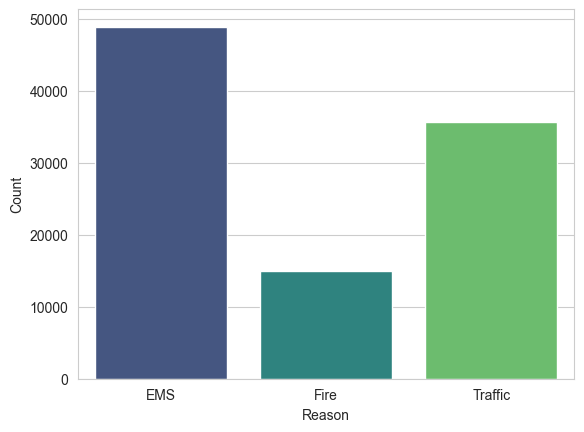

In [13]:
# Set the Seaborn style for the plot
sns.set_style("whitegrid")

# Create a countplot for 911 calls by Reason
sns.countplot(data=df, x='Reason', palette='viridis')

# Add labels
plt.xlabel('Reason')
plt.ylabel('Count')

# Show the plot
plt.show()


___
**Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?**

In [14]:
# Check if the timeStamp column is of type object
if df['timeStamp'].dtype == 'object':
    
    # Print the datatype of the first object in the column
   print(type(df['timeStamp'].iloc[0]))


<class 'str'>


**You should have seen that these timestamps are still strings. Use [pd.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) to convert the column from strings to DateTime objects.**

In [15]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [16]:
df['timeStamp'].dtype

dtype('<M8[ns]')

**You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [17]:
time = df['timeStamp'].iloc[0]
time.hour

17

In [18]:
# Create new columns using .apply()
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.day_name())

# Display the DataFrame with new columns
print(df[['timeStamp', 'Hour', 'Month', 'Day of Week']].head())

            timeStamp  Hour  Month Day of Week
0 2015-12-10 17:40:00    17     12    Thursday
1 2015-12-10 17:40:00    17     12    Thursday
2 2015-12-10 17:40:00    17     12    Thursday
3 2015-12-10 17:40:01    17     12    Thursday
4 2015-12-10 17:40:01    17     12    Thursday


**Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:**

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [19]:
# Extract the integer Day of Week (0 = Monday, 6 = Sunday)
df['Day of Week (int)'] = df['timeStamp'].apply(lambda time: time.dayofweek)

# Map the integers to string names
dmap = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['Day of Week'] = df['Day of Week (int)'].map(dmap)

In [20]:
# Display the DataFrame
print(df[['timeStamp', 'Hour', 'Month', 'Day of Week','Day of Week (int)']].head())

            timeStamp  Hour  Month Day of Week  Day of Week (int)
0 2015-12-10 17:40:00    17     12         Thu                  3
1 2015-12-10 17:40:00    17     12         Thu                  3
2 2015-12-10 17:40:00    17     12         Thu                  3
3 2015-12-10 17:40:01    17     12         Thu                  3
4 2015-12-10 17:40:01    17     12         Thu                  3


**Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.**

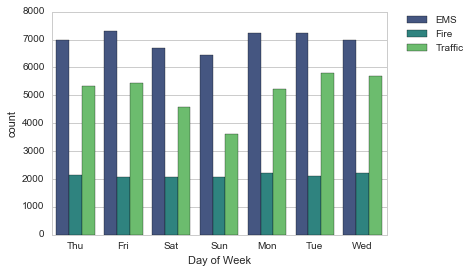

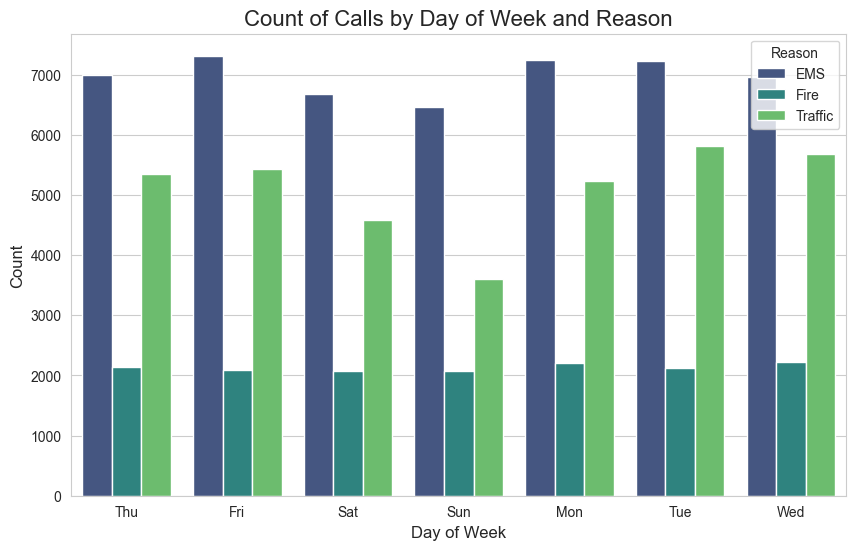

In [24]:
# Create the countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Day of Week', hue='Reason', palette='viridis')

# Add titles and labels
plt.title('Count of Calls by Day of Week and Reason', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Reason')
plt.show()

**Now do the same for Month:**

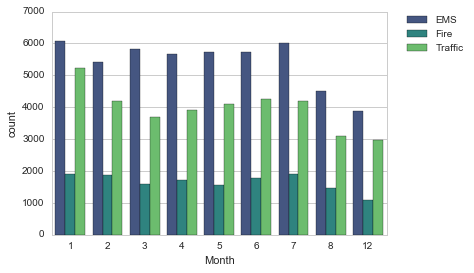

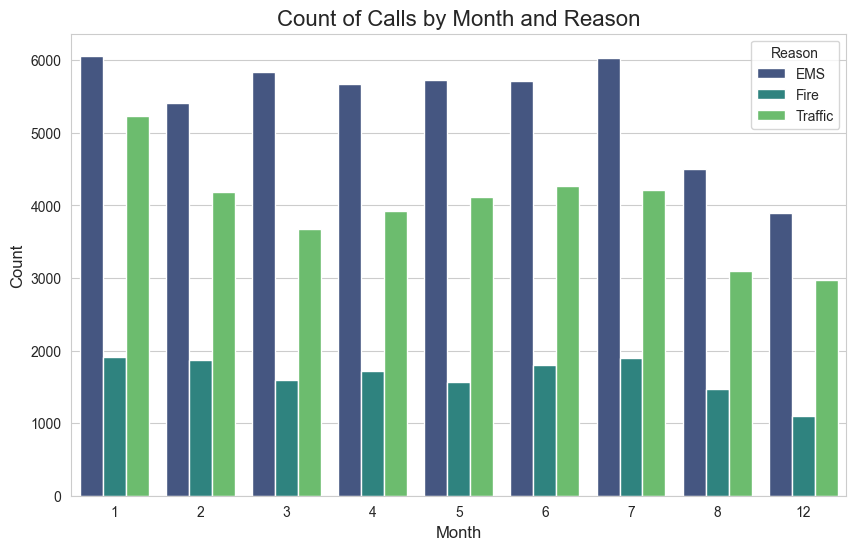

In [26]:
# Create the countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Month', hue='Reason', palette='viridis')

# Add titles and labels
plt.title('Count of Calls by Month and Reason', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Reason')
plt.show()

** Did you notice something strange about the Plot? **

In [42]:
# It is missing some months! 9,10, and 11 are not there.

**You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas...**

**Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame.**

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


In [28]:
# Group the DataFrame by the Month column
byMonth = df.groupby('Month').count()

# Display the first few rows of the grouped data
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week,Day of Week (int)
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


**Now create a simple plot off of the dataframe indicating the count of calls per month.**

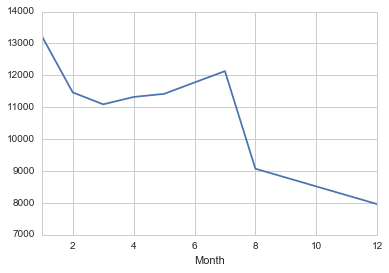

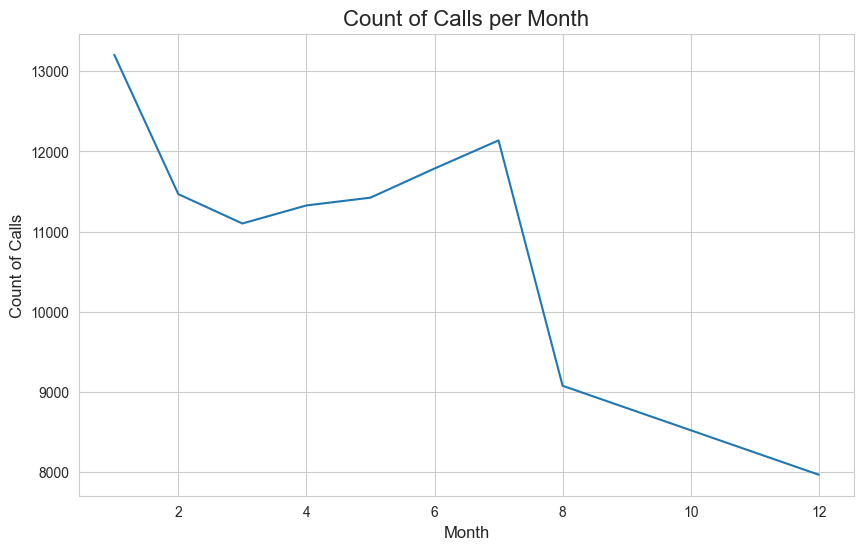

In [29]:
# Plot the counts for each month
plt.figure(figsize=(10, 6))
byMonth['timeStamp'].plot()

# Add titles and labels
plt.title('Count of Calls per Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count of Calls', fontsize=12)

# Show the plot
plt.show()

**Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column.**

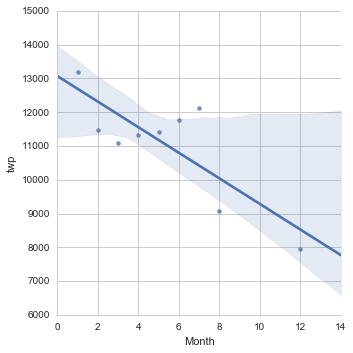

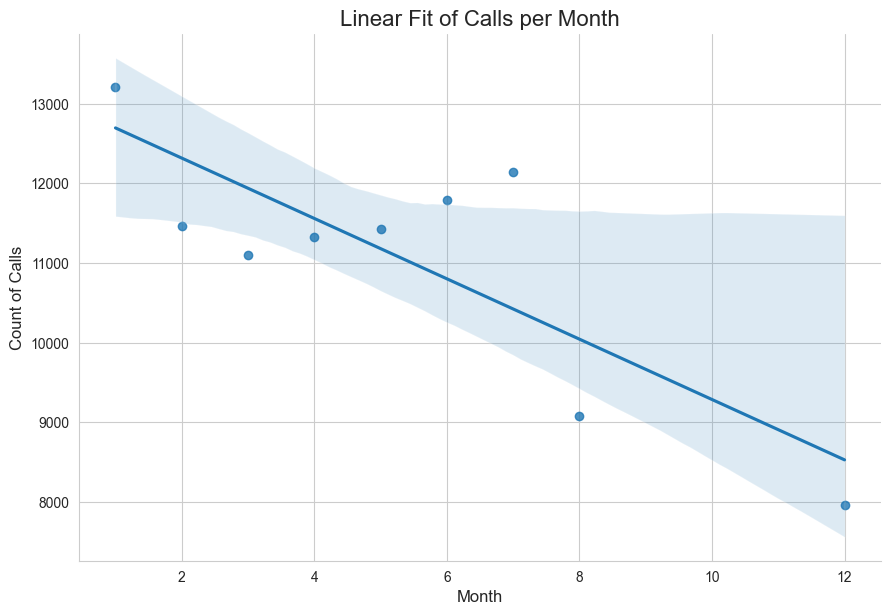

In [30]:
# Reset the index to make 'Month' a column
byMonth = byMonth.reset_index()

# Use seaborn's lmplot to create a linear fit
sns.lmplot(data=byMonth, x='Month', y='timeStamp', height=6, aspect=1.5)

# Add titles and labels
plt.title('Linear Fit of Calls per Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count of Calls', fontsize=12)

# Show the plot
plt.show()

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method.** 

In [32]:
# Create a new 'Date' column by extracting the date part of 'timeStamp'
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

# Display the DataFrame to verify
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Day of Week (int),Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,3,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,3,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,3,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,3,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,3,2015-12-10


**Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

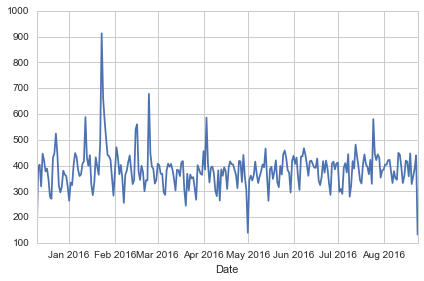

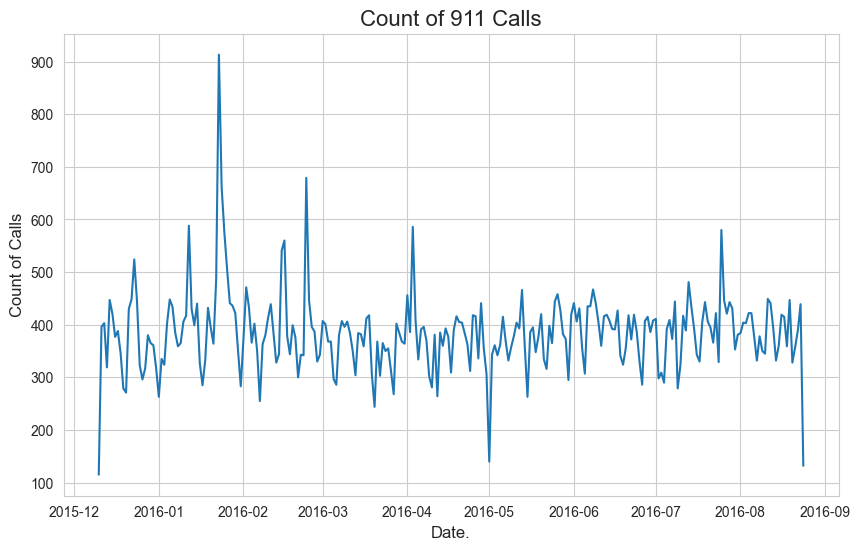

In [33]:
# Group the DataFrame by the Date column
byDate = df.groupby('Date').count()

# Display the first few rows of the grouped data
byDate.head()

# Plot the counts for each date
plt.figure(figsize=(10, 6))
byDate['timeStamp'].plot()

# Add titles and labels
plt.title('Count of 911 Calls', fontsize=16)
plt.xlabel('Date.', fontsize=12)
plt.ylabel('Count of Calls', fontsize=12)

# Show the plot
plt.show()

## Well Done!